## 빅데이터 활용 AI 설계
# 이미지 필터 이해

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(355, 355, 3)


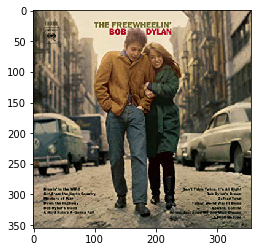

In [2]:
bob = plt.imread('bob_dylan.jpg')

print(bob.shape)
plt.imshow(bob)

- 머신러닝에서는 주로 0~1 사이 실수값으로 이미지를 다룬다.

In [3]:
bob = bob/255

### 필터 개념 (Convolution)

In [4]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([[1,0,1], [0,1,0], [1,0,1]])

display(a,b)
display(a*b)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

array([[1, 0, 3],
       [0, 5, 0],
       [7, 0, 9]])

- 위에서 a 는 원본 이미지, b 는 필터, a\*b 는 변형된 이미지로 볼수 있다.
- 최종 값이 커지므로, a\*b/sum(b) 와 같이 적용하는 경우가 많다

In [6]:
img = np.arange(16).reshape(4,4)
filter = np.array([[1,0,1], [0,1,0], [1,0,1]])/5

display(img, filter)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[0.2, 0. , 0.2],
       [0. , 0.2, 0. ],
       [0.2, 0. , 0.2]])

- 위의 이미지에 필터를 적용하면 어떤 값이 될까?
> 필터를 작은 셀로판 종이라 생각하고 옆으로, 아래로 한 칸씩 이동하며 적용해 보자.

In [7]:
conv = []
for r in range(2): # 4-3+1 (a.shape[0] - b.shape[0] + 1)
    l = []
    for c in range(2): # 4-3+1 (a.shape[1] - b.shape[1] + 1)
        l.append((img[r:r+3, c:c+3]*filter).sum())
    conv.append(l)
    
conv

[[5.0, 6.0], [9.0, 10.0]]

### X 자 필터 적용
- 흑백 이미지에 적용한다

In [9]:
image = bob[:,:,0] # R 채널, 355X355
filter = np.array([[1,0,1],
                   [0,1,0],
                   [1,0,1]])/5 # 3X3

conv = []
for r in range(353): # 355-3+1
    l = []
    for c in range(353): # 353-3+1
        l.append((image[r:r+3, c:c+3]*filter).sum())
    conv.append(l)
    
conv=np.array(conv)
conv.shape

(353, 353)

In [10]:
conv[conv>1] = 1 # 픽셀값이 1보다 커지면 안된다.

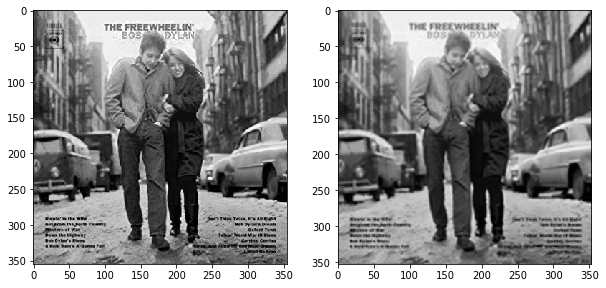

In [13]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(conv, cmap='gray')

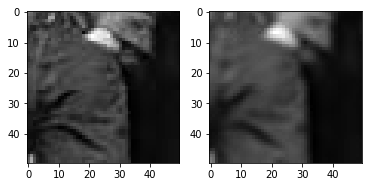

In [14]:
plt.subplot(1,2,1)
plt.imshow(image[150:200, 150:200], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(conv[150:200, 150:200], cmap='gray')

### 모든 채널에 적용하기
- 원본 이미지가 컬러 이므로 3차원의 필터가 필요하다.

In [16]:
image = bob # R 채널, 355X355X3
filter = np.array([[[1,0,1],[0,1,0],[1,0,1]],
                   [[0,1,0],[1,0,1],[0,1,0]],
                   [[1,0,1],[0,1,0],[1,0,1]]])/14 # 3X3X3

conv = []
for r in range(353): # 355-3+1
    l = []
    for c in range(353): # 353-3+1
        l.append((image[r:r+3, c:c+3,:]*filter).sum())
    conv.append(l)
    
conv=np.array(conv)
conv.shape

(353, 353)

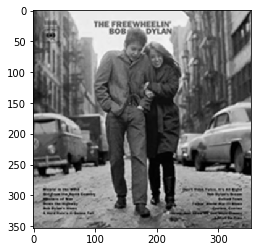

In [18]:
plt.imshow(conv, cmap='gray')

- 원본 이미지 => (355,355,3)
- 필터 => (3,3,3)
- 변환 이미지 => (353,353)
- <font color='red'>흑백 이미지로 변환된다!</font>

### sharpen
- np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) => 외곽선
- np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) => 샤프닝

In [26]:
image = bob # R 채널, 355X355X3
filter1D = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]]) # 8(외곽선), 9(샤프닝), 12, 17
filter = np.zeros([3,3,3])
filter[:,:,0] = filter1D
filter[:,:,1] = filter1D
filter[:,:,2] = filter1D

conv = []
for r in range(353): # 355-3+1
    l = []
    for c in range(353): # 353-3+1
        l.append((image[r:r+3, c:c+3,:]*filter).sum())
    conv.append(l)
    
conv=np.array(conv)
conv[conv>1] = 1
conv[conv<0] = 0
conv.shape

(353, 353)

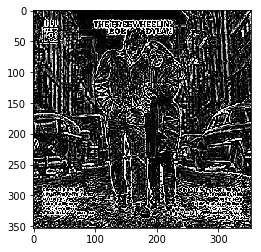

In [27]:
plt.imshow(conv, cmap='gray')

In [24]:
image = bob # R 채널, 355X355X3
filter1D = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]]) # 8(외곽선), 9(샤프닝), 12, 17
filter = np.zeros([3,3,3])
filter[:,:,0] = filter1D
filter[:,:,1] = filter1D
filter[:,:,2] = filter1D

conv = []
for r in range(353): # 355-3+1
    l = []
    for c in range(353): # 353-3+1
        l.append((image[r:r+3, c:c+3,:]*filter).sum())
    conv.append(l)
    
conv=np.array(conv)
conv[conv>1] = 1
conv[conv<0] = 0
conv.shape

(353, 353)

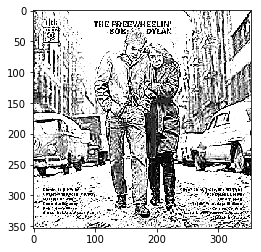

In [25]:
plt.imshow(conv, cmap='gray')

### Emboss

In [34]:
image = bob # R 채널, 355X355X3
filter = np.array([[-2,0,0],
          [0,1,0],
          [0,0,2]])
filter = np.zeros([3,3,3])
filter[:,:,0] = filter1D
filter[:,:,1] = filter1D
filter[:,:,2] = filter1D
#filter = filter/3

conv = []
for r in range(353): # 355-3+1
    l = []
    for c in range(353): # 353-3+1
        l.append((image[r:r+3, c:c+3,:]*filter).sum())
    conv.append(l)
    
conv=np.array(conv)
#conv[conv>1] = 1
#conv[conv<0] = 0
conv.shape

(353, 353)

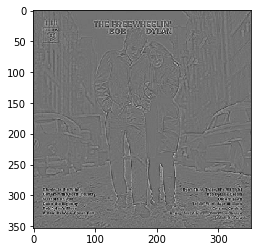

In [35]:
plt.imshow(conv, cmap='gray')

### 이미지 축소 (Pooling)

In [54]:
pool = []
resize=4

for r in range(0,355-(resize-1),resize):
    l = []
    for c in range(0,355-(resize-1),resize):
        l.append(np.max(bob[r:r+resize, c:c+resize, :], axis=(0,1)))
    pool.append(l)

pool = np.array(pool)
pool.shape

(88, 88, 3)

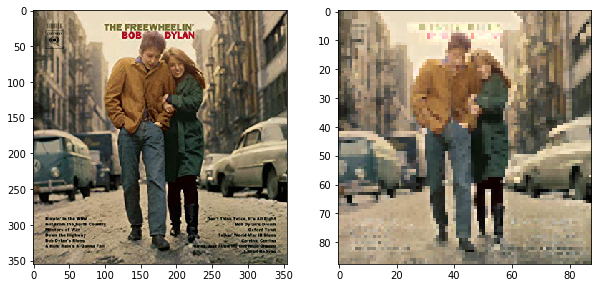

In [55]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.imshow(bob)

plt.subplot(1,2,2)
plt.imshow(pool)